## Task-D: Collinear features and their effect on linear models

In [230]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [231]:
data = pd.read_csv('task_d.csv')

In [232]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [233]:
data.shape

(100, 8)

In [234]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [235]:
data.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


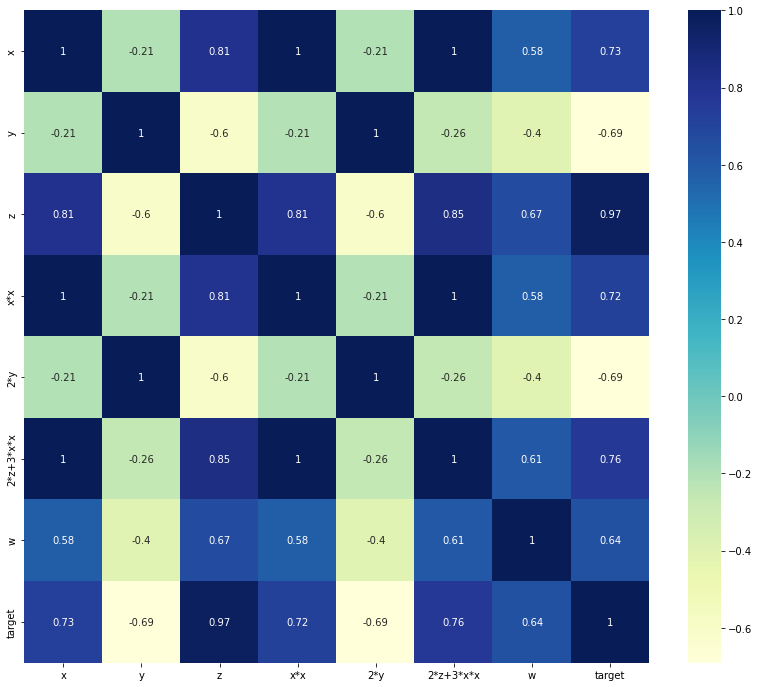

In [236]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

In [237]:
alpha = np.logspace(-5,8,10)
params = {'alpha':alpha}
lr = SGDClassifier(loss='log',penalty='l2')
grid_clf = GridSearchCV(lr,params,cv=5)
grid_clf.fit(X,Y)

GridSearchCV(cv=5, estimator=SGDClassifier(loss='log'),
             param_grid={'alpha': array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])})

In [238]:
grid_clf.best_estimator_

SGDClassifier(alpha=1e-05, loss='log')

In [239]:
best_model = SGDClassifier(loss='log',penalty='l2',alpha=1e-05)
best_model.fit(X,Y)
best_model

SGDClassifier(alpha=1e-05, loss='log')

In [240]:
weight_old = best_model.coef_[0]
print(weight_old)   
best_model_accuracy = best_model.score(X,Y)
print(best_model_accuracy)

[ 24.59917257 -13.28840524  19.31891877  26.2068448  -13.28840524
  25.91881786  27.25081906]
1.0


In [241]:
X_new = X+0.01

In [242]:
best_model_edited_clf = SGDClassifier(loss='log',penalty='l2',alpha=1e-05)
best_model_edited = best_model_edited_clf.fit(X_new,Y)

In [243]:
best_model_accuracy_edited = best_model_edited.score(X_new,Y)
weight_new = best_model_edited.coef_[0]
print(weight_new)

[ 20.77549156 -21.11725959  48.72038098  18.09632883 -21.11725959
  22.16406681  36.921672  ]


In [244]:
print(best_model_accuracy - best_model_accuracy_edited)
diff = weight_old - weight_new
print(diff)
print(abs(diff))

0.0
[  3.82368102   7.82885435 -29.40146221   8.11051597   7.82885435
   3.75475104  -9.67085294]
[ 3.82368102  7.82885435 29.40146221  8.11051597  7.82885435  3.75475104
  9.67085294]


In [245]:
percentage_list = [(abs(diff[i])/weight_old[i])*100 for i in range(len(diff))]                                                              

sort_idx = np.argsort(percentage_list)[-4:]
top_4_feature = []
for idx in sort_idx:
    top_4_feature.append(data.columns[idx])

print(top_4_feature)

['x', 'x*x', 'w', 'z']


<h1> Task 2-SVM </h1>

In [246]:
alpha = np.logspace(-5,8,10)
params = {'alpha':alpha}
svm = SGDClassifier(loss='hinge',penalty='l2')
grid_clf = GridSearchCV(svm,params,cv=5)
grid_clf.fit(X,Y)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': array([1.00000000e-05, 2.78255940e-04, 7.74263683e-03, 2.15443469e-01,
       5.99484250e+00, 1.66810054e+02, 4.64158883e+03, 1.29154967e+05,
       3.59381366e+06, 1.00000000e+08])})

In [247]:
grid_clf.best_estimator_

SGDClassifier(alpha=1e-05)

In [248]:
best_model = SGDClassifier(loss='hinge',penalty='l2',alpha=1e-05)
best_model.fit(X,Y)
best_model

SGDClassifier(alpha=1e-05)

In [249]:
weight_old = best_model.coef_[0]
print(weight_old)   
best_model_accuracy = best_model.score(X,Y)
print(best_model_accuracy)

[ 14.14505732 -29.91752212  40.14823854  12.20168811 -29.91752212
  15.82881619 -12.9989356 ]
1.0


In [250]:
X_new = X+0.01

In [251]:
best_model_edited_clf = SGDClassifier(loss='hinge',penalty='l2',alpha=1e-05)
best_model_edited = best_model_edited_clf.fit(X_new,Y)

In [252]:
best_model_accuracy_edited = best_model_edited.score(X_new,Y)
weight_new = best_model_edited.coef_[0]
print(weight_new)

[ 22.29518667 -19.92287822  27.41616945  20.05847633 -19.92287822
  21.36282798   5.47346723]


In [253]:
print(best_model_accuracy - best_model_accuracy_edited)
diff = weight_old - weight_new
print(diff)
print(abs(diff))

0.0
[ -8.15012935  -9.99464391  12.73206909  -7.85678823  -9.99464391
  -5.53401179 -18.47240283]
[ 8.15012935  9.99464391 12.73206909  7.85678823  9.99464391  5.53401179
 18.47240283]


In [254]:
percentage_list = np.array([(abs(diff[i])/weight_old[i])*100 for i in range(len(diff))])                                                              

sort_idx = np.argsort(percentage_list)[-4:]
top_4_feature = []
for idx in sort_idx:
    top_4_feature.append(data.columns[idx])

print(top_4_feature)

['z', '2*z+3*x*x', 'x', 'x*x']


1. We can see from the heatmap, lot of feature are heavily correlated with each other.

2. In case of LR the difference we get in weights from old model and new model after adding noise is significant indicating the effect of pertubation/change in data hence the weight are not interpretable or it is difficult to interpret the weights as feature importance.

3. Same thing was observed in case of SVM where the weights are altered to great extend as soon as ver small noise as added to the data. Hence we can conclude that weights are not interpretable for feature importance.
